# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Richard Tormin Octavian Tobing
- **Email:** rtobing2001@gmail.com
- **ID Dicoding:** richard_tot

## Menentukan Pertanyaan Bisnis

- Produk apa yang memiliki performa jual yang tinggi pada Olist Store?
- Berapa rerata jarak antara penjual dengan pembeli?
- Bagaimana RFM pada Olist Store pada dari tahun 2016-2018?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

## Data Wrangling

### Gathering Data

In [8]:
# Dataset Pelanggan
customers_df = pd.read_csv("olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
# Dataset Lokasi di Brazil
geolocation_df = pd.read_csv("olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
# Dataset Pesanan
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
# Dataset Pembayaran
order_payments_df = pd.read_csv("olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
# Dataset Ulasan Pembeli
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
# Dataset Pengiriman
orders_df = pd.read_csv("olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
# Dataset Produk
products_df = pd.read_csv("olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
# Dataset Penjual
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
# Dataset Nama Produk dalam Bahasa Inggris
category_name_df = pd.read_csv("product_category_name_translation.csv")
category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Terdapat 9 dataset dari Brazilian E-Commerce Public Dataset by Olist yang merupakan pesanan pelanggan telah dibuat dari tahun 2016 hingga 2018.
- Dataset terhubung melalui kolom order_id, product_id, seller_id, customer_id, dan zip_code_prefix.
- Dataset terdiri dari daftar pelanggan, daftar lokasi di Brazil, daftar pesanan, daftar pembayaran, ulasan pembeli, daftar pengiriman, daftar produk, daftar penjual, dan daftar produk dalam bahasa Inggris.

### Assessing Data

In [19]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [20]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum()) 

Jumlah duplikasi:  0


In [21]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [22]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [23]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [24]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [25]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe() 

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [27]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe() # ini disesuaikan kembali payment_installments dan payment_value

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe() # ada yang ngga review, nanti ditambal dengan rata2 aja yang ngga review

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe() 

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [32]:
products_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
print("Jumlah duplikasi: ",products_df.duplicated().sum()) 
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [34]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum()) 

Jumlah duplikasi:  0


In [36]:
category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
print("Jumlah duplikasi: ",category_name_df.duplicated().sum()) 

Jumlah duplikasi:  0


**Insight:**
- Berikut adalah hasil dari Assesing Data

|      Data Set         | Tipe data | Missing value | Duplicate data | Inaccurate value|
|----------------- | --------- | ------------- | -------------- | ----------------|
|customers_df      |      -     |       -        |       -         |     -    |        
|geolocation_df    |      -     |       -        |       261831          |      -      |     
|order_items_df    |     -      |       -        |       -         |   -         |     
|order_payments_df |     -      |       -        |      -          |     Ada       |     
|order_reviews_df  |     -      |       Ada        |       -         |     -        |    
|orders_df         |     Ada      |       Ada        |       -         |      -         |  
|products_df       |    -       |       Ada        |     -           |      -        |   
|sellers_df        |     -      |       -        |      -          |       -     |     
|category_name_df  |      -     |         -      |       -         |       -     |     

### Cleaning Data

In [40]:
geolocation_df.drop_duplicates(inplace=True)

In [41]:
order_items_df['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [42]:
Q1 = (order_items_df['freight_value']).quantile(0.25)
Q3 = (order_items_df['freight_value']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

print(IQR)
print(maximum)
print(minimum)

8.069999999999999
33.254999999999995
0.9750000000000032


In [43]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [44]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [45]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [46]:
order_reviews_df.review_comment_title.fillna(value="-", inplace=True)
order_reviews_df.review_comment_message.fillna(value="-", inplace=True)
order_reviews_df.info()
# Mengisi data kosong pada review_comment_title dan review_comment_message dengan "-"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\1004617753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_title.fillna(value="-", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\1004617753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [47]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date",
                    "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

# Mengubah tipe data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,
# dan order_estimated_delivery_date menjadi tipe data waktu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [48]:
orders_df = orders_df.sort_values(by='order_purchase_timestamp')
orders_df.head() 
# Mengurutkan data berdasarkan waktu order_purchase_timestamp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


In [49]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 4541 to 60938
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [50]:
orders_df.order_approved_at.interpolate(method='linear', limit_direction='forward', inplace=True)
# Mengisi data kosong pada order_approved_at dengan interpolasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\2372597909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_approved_at.interpolate(method='linear', limit_direction='forward', inplace=True)


In [51]:
orders_df.order_delivered_carrier_date.interpolate(method='linear', limit_direction='forward', inplace=True)
# Mengisi data kosong pada order_delivered_carrier_date dengan interpolasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\2848897711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_carrier_date.interpolate(method='linear', limit_direction='forward', inplace=True)


In [52]:
orders_df.order_delivered_customer_date.interpolate(method='linear', limit_direction='forward', inplace=True)
# Mengisi data kosong pada order_delivered_customer_date dengan interpolasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\1401976813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_customer_date.interpolate(method='linear', limit_direction='forward', inplace=True)


In [53]:
orders_df.order_delivered_customer_date.interpolate(method='linear', limit_direction='backward', inplace=True)
orders_df
# Mengisi data kosong pada order_delivered_customer_date dengan interpolasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\1188896204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_customer_date.interpolate(method='linear', limit_direction='backward', inplace=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51.000000000,2016-11-09 07:47:38.000,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,2016-10-25 06:33:51.666666752,2016-11-09 07:47:38.000,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,2016-10-31 23:52:52.333333248,2016-11-09 07:47:38.000,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53.000000000,2016-11-09 07:47:38.000,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,2016-10-31 03:37:03.000000000,2016-11-02 10:54:55.500,2016-10-25
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-10-15
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-10-23
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-10-16
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-11-12


In [54]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 4541 to 60938
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [55]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [56]:
products_df.product_category_name.fillna(value="-", inplace=True)
products_df.product_name_lenght.fillna(value=products_df["product_name_lenght"].mean(), inplace=True)
products_df.product_description_lenght.fillna(value=products_df["product_description_lenght"].mean(), inplace=True)
products_df.product_photos_qty.fillna(value=products_df["product_photos_qty"].mean(), inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\2692228037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value="-", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\2692228037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

**Insight:**


Pada tahap cleaning data, dilakukakan hal-hal berikut:

- Menghapus duplikasi data pada dataframe geolocation_df
- Melakukan imputation pada data outlier pada kolom payment_value dataframe order_payments_df
- Mengubah tipe data menjadi tipe data waktu serta melakukan interpolasi untuk mengisi data kosong pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date dataframe orders_df
- Mengisi data kosong pada kolom review_comment_title dan review_comment_message dataframe order_reviews_df dengan string "-"
- Pada  dataframe products_df, mengisi data kosong pada kolom product_category_name dengan "-" dan pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty dengan mean masing-masing kolom

## Exploratory Data Analysis (EDA)

### Explore order_items_df

In [60]:
Q1 = (order_payments_df['payment_value']).quantile(0.25)
Q3 = (order_payments_df['payment_value']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

print(IQR)
print(maximum)
print(minimum)

kondisi_more_than = order_payments_df['payment_value'] > maximum

order_payments_df['payment_value'].mask(kondisi_more_than, maximum, inplace=True)

115.04750000000001
344.40875000000005
-115.78125000000003


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\379417617.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_payments_df['payment_value'].mask(kondisi_more_than, maximum, inplace=True)


In [61]:
order_items_df["order_item_value"]= order_items_df["order_item_id"]*order_items_df["price"] 
# Membuat order_item_value, yaitu harga barang dibayarkan berdasarkan harga barang dan banyak barang yang dibeli

In [62]:
order_items_df["order_value"] = order_items_df["order_item_id"]*order_items_df["price"] + order_items_df["order_item_id"]*order_items_df["freight_value"] 
# Membuat order_value, yaitu harga pesanan dibayarkan berdasarkan harga barang dan  harga pengiriman barang
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_item_value,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,218.04


In [63]:
Q1 = (order_items_df['order_value']).quantile(0.25)
Q3 = (order_items_df['order_value']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

print(IQR)
print(maximum)
print(minimum)
order_items_df.describe()

114.80000000000001
348.07000000000005
-111.13000000000002


,order_item_id,price,freight_value,order_item_value,order_value
count,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,136.686539,160.304175
std,0.705124,183.633928,15.806405,217.468683,228.532489
min,1.000000,0.850000,0.000000,0.850000,6.080000
25%,1.000000,39.900000,13.080000,45.000000,61.070000
50%,1.000000,74.990000,16.260000,84.495000,103.550000
75%,1.000000,134.900000,21.150000,149.900000,175.870000
max,21.000000,6735.000000,409.680000,13440.000000,13664.080000


In [64]:
all_df = order_items_df[["order_id","order_item_id","product_id","seller_id","price","freight_value",
                         "order_item_value","order_value"]]
all_df
# Membuat dataframe all_df untuk semua data yang diperlukan

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,299.99,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,350.00,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,99.90,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,55.99,64.71


In [65]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   freight_value     112650 non-null  float64
 6   order_item_value  112650 non-null  float64
 7   order_value       112650 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.9+ MB


**Insight:**
- Diperoleh order_item_value, yaitu biaya dikeluarkan oleh pembeli berdasarkan banyak barang dan harga barang yang dibeli
- Diperoleh order_value, yaitu biaya dikeluarkan oleh pembeli berdasarkan banyak barang, harga barang yang dibeli, dan ongkos kirim

### Explore orders_df

In [68]:
all_df = pd.merge(
    left=all_df,
    right=orders_df[["order_id","customer_id","order_status", "order_purchase_timestamp", "order_delivered_customer_date"]],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [69]:
delivery_time = all_df["order_delivered_customer_date"] - all_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

delivery_time=round(delivery_time/86400)

kondisi_less_than = delivery_time < 0

delivery_time.mask(kondisi_less_than, 0, inplace=True)

all_df["delivery_time"] = delivery_time
all_df

# Membuat delivery_time, yaitu waktu yang dibutuhkan dari penjual mempersiapkan barang hingga barang dikirm ke pelanggan

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,299.99,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,17.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,350.00,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,9.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,99.90,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,5.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,55.99,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2.0


In [70]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

In [71]:
all_df.delivery_time.describe()

count    112650.000000
mean         12.440036
std           9.404030
min           0.000000
25%           7.000000
50%          10.000000
75%          16.000000
max         210.000000
Name: delivery_time, dtype: float64

In [72]:
Q1 = delivery_time.quantile(0.25)
Q3 = delivery_time.quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)

kondisi_more_than = delivery_time > maximum
delivery_time.mask(kondisi_more_than, maximum, inplace=True)

delivery_time.describe()

count    112650.000000
mean         11.894976
std           7.127846
min           0.000000
25%           7.000000
50%          10.000000
75%          16.000000
max          29.500000
dtype: float64

**Insight:**
- Diperoleh delivery_time, yaitu waktu yang dibutuhkan dari penjual mempersiapkan barang hingga barang dikirm ke pelanggan
- Rerata delivery_time adalah 12 hari

### Explore order_payments_df

In [75]:
payment = order_payments_df.groupby(by="order_id").agg({"payment_value" : "sum"})
payment
# Harga yang harus dibayarkan pembeli berdasarkan payment_sequential, payment_type, dan payment_installments

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19000
00018f77f2f0320c557190d7a144bdd3,259.83000
000229ec398224ef6ca0657da4fc703e,216.87000
00024acbcdf0a6daa1e931b038114c75,25.78000
00042b26cf59d7ce69dfabb4e55b4fd9,218.04000
...,...
fffc94f6ce00a00581880bf54a75a037,343.40000
fffcd46ef2263f404302a634eb57f7eb,344.40875
fffce4705a9662cd70adb13d4a31832d,116.85000


In [76]:
all_df = pd.merge(
    left=all_df,
    right=payment,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,8.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,16.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,8.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,6.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,25.0,218.04


In [77]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

**Insight:**
- Diperoleh payment_value, yaitu biaya yang dikeluarkan oleh pembeli berdasarkan harga barang, banyak barang yang dibeli, ongkos kirim, metode pembayaran dan cicilan yang diambil

### Explore customers_df

In [80]:
all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,8.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,16.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,8.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,6.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,25.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [81]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

**Insight:**
- Menggabungkan dataframe all_df dan customers_df berdasarkan customer_id

### Explore sellers_df

In [84]:
all_df = pd.merge(
    left=all_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,...,order_delivered_customer_date,delivery_time,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-20 23:43:48,8.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-05-12 16:04:24,16.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-01-22 13:19:16,8.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-14 13:32:39,6.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-03-01 16:42:31,25.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR


In [85]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

**Insight:**
- Menggabungkan dataframe all_df dan sellers_df berdasarkan seller_id

### Explore products_df dan category_name_df

In [88]:
all_df = pd.merge(
    left=all_df,
    right=products_df[["product_id","product_category_name"]],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [89]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

In [90]:
all_df = pd.merge(
    left=all_df,
    right=category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

In [91]:
all_df.product_category_name.fillna(value="-", inplace=True)
all_df.product_category_name_english.fillna(value="-", inplace=True)
all_df.info()
# Mengisi data kosong pada product_category_name dan product_category_name_english dengan "-"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   price                          112650 non-null  float64       
 5   freight_value                  112650 non-null  float64       
 6   order_item_value               112650 non-null  float64       
 7   order_value                    112650 non-null  float64       
 8   customer_id                    112650 non-null  object        
 9   order_status                   112650 non-null  object        
 10  order_purchase_timestamp       112650 non-null  datetime64[ns]
 11  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\527912628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df.product_category_name.fillna(value="-", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\527912628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [92]:
sales_product_df = all_df[["order_id","product_category_name_english","order_item_id","order_item_value","customer_state"]]
sales_product_df.head()

,order_id,product_category_name_english,order_item_id,order_item_value,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,1,58.90,RJ
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,1,239.90,SP
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,1,199.00,MG
3,00024acbcdf0a6daa1e931b038114c75,perfumery,1,12.99,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,1,199.90,SP


In [93]:
sales_df = sales_product_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "order_item_value": "sum"
})
sales_df.rename(columns={
    "order_id": "order_count",
    "order_item_id" : "item_sold",
    "order_item_value" : "item_value"
}, inplace=True)
sales_df

,order_count,item_sold,item_value
product_category_name_english,,,
-,1473,1905,202976.20
agro_industry_and_commerce,182,265,91634.76
air_conditioning,253,362,67920.69
art,202,230,25366.09
arts_and_craftmanship,23,26,1875.90
...,...,...,...
stationery,2311,2805,245569.71
tablets_printing_image,79,89,8082.21
telephony,4199,5161,360139.72


In [94]:
sales_df[["order_count"]].sort_values(by="order_count", ascending=False).head(10)

,order_count
product_category_name_english,
bed_bath_table,9417
health_beauty,8836
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449
housewares,5884
watches_gifts,5624
telephony,4199
auto,3897


In [95]:
sales_df[["order_count"]].sort_values(by="order_count", ascending=True).head(10)

,order_count
product_category_name_english,
security_and_services,2
fashion_childrens_clothes,8
cds_dvds_musicals,12
la_cuisine,13
arts_and_craftmanship,23
home_comfort_2,24
diapers_and_hygiene,27
fashion_sport,27
flowers,29


In [96]:
sales_df[["item_sold"]].sort_values(by="item_sold", ascending=False).head(10)

,item_sold
product_category_name_english,
bed_bath_table,13665
furniture_decor,11540
health_beauty,11081
sports_leisure,9932
computers_accessories,9874
housewares,9051
watches_gifts,6594
garden_tools,5874
telephony,5161


In [97]:
sales_df[["item_sold"]].sort_values(by="item_sold", ascending=True).head(10)

,item_sold
product_category_name_english,
security_and_services,2
fashion_childrens_clothes,8
cds_dvds_musicals,16
la_cuisine,16
arts_and_craftmanship,26
flowers,37
furniture_mattress_and_upholstery,38
fashion_sport,38
music,39


In [98]:
sales_df[["item_value"]].sort_values(by="item_value", ascending=False).head(10)

,item_value
product_category_name_english,
health_beauty,1347468.49
watches_gifts,1259634.58
bed_bath_table,1228795.46
computers_accessories,1135454.64
sports_leisure,1082435.42
furniture_decor,929520.95
housewares,750233.73
auto,662861.88
cool_stuff,659590.61


In [99]:
sales_df[["item_value"]].sort_values(by="item_value", ascending=True).head(10)

,item_value
product_category_name_english,
security_and_services,283.29
fashion_childrens_clothes,569.85
cds_dvds_musicals,820.00
home_comfort_2,876.37
flowers,1257.14
arts_and_craftmanship,1875.90
la_cuisine,2218.99
diapers_and_hygiene,2255.59
fashion_sport,2483.80


**Insight:**
- Memasukkan product_category_name dan product_category_name_english ke dataframe all_df dari products_df dan category_name_df berdasarkan product_id
- Terdapat product_category_name yang tidak memiliki product_category_name_english sehingga dimasukkan dengan "-"
- Untuk banyak order produk yang dilakukan, produk yang terbanyak dan terdikit masing-masing adalah bed_bath_table dengan 9417 order dan security_and_services dengan 2 order
- Untuk banyak produk yang dibeli, produk yang terbanyak dan terdikit masing-masing adalah bed_bath_table sebanyak 13923 produk dan security_and_services 2 produk
- Untuk penghasilan dari produk, produk yang terbanyak dan terdikit masing-masing adalah health_beauty dengan penghasilan 1353389.90 BRL dan security_and_services dengan penghasilan 3524.17 BRL

### Explore order_reviews_df

In [102]:
all_df = pd.merge(
    left=all_df,
    right=order_reviews_df[["order_id","review_score"]],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff,cool_stuff,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,pet_shop,pet_shop,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,moveis_decoracao,furniture_decor,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP,perfumaria,perfumery,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR,ferramentas_jardim,garden_tools,5.0


In [103]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   price                          113314 non-null  float64       
 5   freight_value                  113314 non-null  float64       
 6   order_item_value               113314 non-null  float64       
 7   order_value                    113314 non-null  float64       
 8   customer_id                    113314 non-null  object        
 9   order_status                   113314 non-null  object        
 10  order_purchase_timestamp       113314 non-null  datetime64[ns]
 11  

In [104]:
all_df.review_score.fillna(value=all_df.review_score.mean().round(), inplace=True) 
# Mengisi data kosong review_score dengan rerata nilai review_score

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\3989932259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df.review_score.fillna(value=all_df.review_score.mean().round(), inplace=True)


In [105]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   price                          113314 non-null  float64       
 5   freight_value                  113314 non-null  float64       
 6   order_item_value               113314 non-null  float64       
 7   order_value                    113314 non-null  float64       
 8   customer_id                    113314 non-null  object        
 9   order_status                   113314 non-null  object        
 10  order_purchase_timestamp       113314 non-null  datetime64[ns]
 11  

In [106]:
review_df = all_df[["product_category_name_english", "review_score"]].groupby(by=["product_category_name_english"]).agg({
    "review_score": "mean"
})
review_df.head()

,review_score
product_category_name_english,
-,3.834352
agro_industry_and_commerce,4.000000
air_conditioning,3.969697
art,3.937799
arts_and_craftmanship,4.125000


In [107]:
review_df.sort_values(by="review_score",ascending=True).head(10)

,review_score
product_category_name_english,
security_and_services,2.500000
diapers_and_hygiene,3.256410
office_furniture,3.497354
fashion_male_clothing,3.643939
home_comfort_2,3.666667
fixed_telephony,3.686792
party_supplies,3.767442
fashio_female_clothing,3.780000
furniture_mattress_and_upholstery,3.815789


In [108]:
review_df.sort_values(by="review_score",ascending=False).head(10)

,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.443038
costruction_tools_tools,4.427184
books_imported,4.400000
flowers,4.393939
books_technical,4.364312
food_drink,4.314286
luggage_accessories,4.314103


**Insight:**
- Memasukkan review_score ke dataframe all_df dan untuk data yang kosong diberi nilai mean dari kolom review_score
- Produk dengan review_score tertinggi dan terendah masing-masing adalah cds_dvds_musicals dengan 4.642857 dan security_and_services dengan 2.5

### Explore geolocation_df

In [111]:
geolocation_update_df = geolocation_df.groupby(by=["geolocation_zip_code_prefix","geolocation_state"], as_index=False).agg({
    "geolocation_lat": "mean", 
    "geolocation_lng": "mean"
})

geolocation_update_df

,geolocation_zip_code_prefix,geolocation_state,geolocation_lat,geolocation_lng
0,1001,SP,-23.550227,-46.634039
1,1002,SP,-23.547657,-46.634991
2,1003,SP,-23.549000,-46.635582
3,1004,SP,-23.549829,-46.634792
4,1005,SP,-23.549547,-46.636406
...,...,...,...,...
19018,99960,RS,-27.953722,-52.025511
19019,99965,RS,-28.183372,-52.039850
19020,99970,RS,-28.343920,-51.874988
19021,99980,RS,-28.389500,-51.843122


In [112]:
geolocation_update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19023 entries, 0 to 19022
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19023 non-null  int64  
 1   geolocation_state            19023 non-null  object 
 2   geolocation_lat              19023 non-null  float64
 3   geolocation_lng              19023 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 594.6+ KB


In [113]:
geoloc_state_df = geolocation_df.groupby(by=["geolocation_state"], as_index=False).agg({
    "geolocation_lat": "mean", 
    "geolocation_lng": "mean"
})
geoloc_state_df

,geolocation_state,geolocation_lat,geolocation_lng
0,AC,-9.709319,-68.453261
1,AL,-9.592373,-36.067588
2,AM,-3.346562,-60.535697
3,AP,0.073767,-51.204454
4,BA,-13.062407,-39.627164
5,CE,-4.395199,-39.028335
6,DF,-15.814327,-47.979684
7,ES,-20.078083,-40.516053
8,GO,-16.567440,-49.344447
9,MA,-3.821203,-44.818273


In [114]:
geoloc_state_df = geoloc_state_df.rename(columns={'geolocation_lat': 'state_geolocation_lat','geolocation_lng':'state_geolocation_lng'})
geoloc_state_df.head()

,geolocation_state,state_geolocation_lat,state_geolocation_lng
0,AC,-9.709319,-68.453261
1,AL,-9.592373,-36.067588
2,AM,-3.346562,-60.535697
3,AP,0.073767,-51.204454
4,BA,-13.062407,-39.627164


In [115]:
geolocation_update_df = pd.merge(
    left=geolocation_update_df,
    right=geoloc_state_df,
    how="left",
    left_on="geolocation_state",
    right_on="geolocation_state"
)
geolocation_update_df

,geolocation_zip_code_prefix,geolocation_state,geolocation_lat,geolocation_lng,state_geolocation_lat,state_geolocation_lng
0,1001,SP,-23.550227,-46.634039,-23.086681,-47.161805
1,1002,SP,-23.547657,-46.634991,-23.086681,-47.161805
2,1003,SP,-23.549000,-46.635582,-23.086681,-47.161805
3,1004,SP,-23.549829,-46.634792,-23.086681,-47.161805
4,1005,SP,-23.549547,-46.636406,-23.086681,-47.161805
...,...,...,...,...,...,...
19018,99960,RS,-27.953722,-52.025511,-29.649720,-52.064923
19019,99965,RS,-28.183372,-52.039850,-29.649720,-52.064923
19020,99970,RS,-28.343920,-51.874988,-29.649720,-52.064923
19021,99980,RS,-28.389500,-51.843122,-29.649720,-52.064923


In [116]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   price                          113314 non-null  float64       
 5   freight_value                  113314 non-null  float64       
 6   order_item_value               113314 non-null  float64       
 7   order_value                    113314 non-null  float64       
 8   customer_id                    113314 non-null  object        
 9   order_status                   113314 non-null  object        
 10  order_purchase_timestamp       113314 non-null  datetime64[ns]
 11  

In [117]:
geolocation_update_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19023 entries, 0 to 19022
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19023 non-null  int64  
 1   geolocation_state            19023 non-null  object 
 2   geolocation_lat              19023 non-null  float64
 3   geolocation_lng              19023 non-null  float64
 4   state_geolocation_lat        19023 non-null  float64
 5   state_geolocation_lng        19023 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 891.8+ KB


In [118]:
all_df = pd.merge(
    left=all_df,
    right=geolocation_update_df[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]],
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_df

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,review_score,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,RJ,27277,volta redonda,SP,cool_stuff,cool_stuff,5.0,28013.0,-21.763186,-41.310265
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,SP,3471,sao paulo,SP,pet_shop,pet_shop,4.0,15775.0,-20.222506,-50.898951
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,MG,37564,borda da mata,MG,moveis_decoracao,furniture_decor,5.0,35661.0,-19.869998,-44.593059
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,SP,14403,franca,SP,perfumaria,perfumery,4.0,12952.0,-23.105968,-46.590277
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,SP,87900,loanda,PR,ferramentas_jardim,garden_tools,5.0,13226.0,-23.243402,-46.827614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113404,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,299.99,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,MA,88303,itajai,SC,utilidades_domesticas,housewares,5.0,65077.0,-2.499937,-44.295904
113405,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,350.00,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,...,PR,1206,sao paulo,SP,informatica_acessorios,computers_accessories,5.0,81690.0,-25.582933,-49.313298
113406,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,99.90,116.85,29309aa813182aaddc9b259e31b870e6,delivered,...,SP,80610,curitiba,PR,esporte_lazer,sports_leisure,5.0,4039.0,-23.597320,-46.643843
113407,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,55.99,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,...,SP,4733,sao paulo,SP,informatica_acessorios,computers_accessories,5.0,13289.0,-23.039798,-46.979488


In [119]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113409 non-null  object        
 1   order_item_id                  113409 non-null  int64         
 2   product_id                     113409 non-null  object        
 3   seller_id                      113409 non-null  object        
 4   price                          113409 non-null  float64       
 5   freight_value                  113409 non-null  float64       
 6   order_item_value               113409 non-null  float64       
 7   order_value                    113409 non-null  float64       
 8   customer_id                    113409 non-null  object        
 9   order_status                   113409 non-null  object        
 10  order_purchase_timestamp       113409 non-null  datetime64[ns]
 11  

In [120]:
i = 0
while i < len(all_df["order_id"]):
    cek = pd.isna(all_df["geolocation_lat"][i])
    # print(cek)
    if cek == True:
        all_df["geolocation_lat"][i] = geoloc_state_df.loc[geoloc_state_df["geolocation_state"] == all_df["customer_state"][i], 'state_geolocation_lat'].iloc[0]
        all_df["geolocation_lng"][i] = geoloc_state_df.loc[geoloc_state_df["geolocation_state"] == all_df["customer_state"][i], 'state_geolocation_lng'].iloc[0]
    i = i+1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\3588086715.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_df["geolocation_lat"][i] = geoloc_state_df.loc[geoloc_state_df["geolocation_state"] == all_df["customer_state"][i], 'state_ge

In [121]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113409 non-null  object        
 1   order_item_id                  113409 non-null  int64         
 2   product_id                     113409 non-null  object        
 3   seller_id                      113409 non-null  object        
 4   price                          113409 non-null  float64       
 5   freight_value                  113409 non-null  float64       
 6   order_item_value               113409 non-null  float64       
 7   order_value                    113409 non-null  float64       
 8   customer_id                    113409 non-null  object        
 9   order_status                   113409 non-null  object        
 10  order_purchase_timestamp       113409 non-null  datetime64[ns]
 11  

In [122]:
all_df = all_df.rename(columns={'geolocation_lat': 'customer_geolocation_lat','geolocation_lng':'customer_geolocation_lng'})
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,review_score,geolocation_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,RJ,27277,volta redonda,SP,cool_stuff,cool_stuff,5.0,28013.0,-21.763186,-41.310265
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,SP,3471,sao paulo,SP,pet_shop,pet_shop,4.0,15775.0,-20.222506,-50.898951
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,MG,37564,borda da mata,MG,moveis_decoracao,furniture_decor,5.0,35661.0,-19.869998,-44.593059
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,SP,14403,franca,SP,perfumaria,perfumery,4.0,12952.0,-23.105968,-46.590277
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,SP,87900,loanda,PR,ferramentas_jardim,garden_tools,5.0,13226.0,-23.243402,-46.827614


In [123]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113409 non-null  object        
 1   order_item_id                  113409 non-null  int64         
 2   product_id                     113409 non-null  object        
 3   seller_id                      113409 non-null  object        
 4   price                          113409 non-null  float64       
 5   freight_value                  113409 non-null  float64       
 6   order_item_value               113409 non-null  float64       
 7   order_value                    113409 non-null  float64       
 8   customer_id                    113409 non-null  object        
 9   order_status                   113409 non-null  object        
 10  order_purchase_timestamp       113409 non-null  datetime64[ns]
 11  

In [124]:
all_df.drop("geolocation_zip_code_prefix", axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113409 non-null  object        
 1   order_item_id                  113409 non-null  int64         
 2   product_id                     113409 non-null  object        
 3   seller_id                      113409 non-null  object        
 4   price                          113409 non-null  float64       
 5   freight_value                  113409 non-null  float64       
 6   order_item_value               113409 non-null  float64       
 7   order_value                    113409 non-null  float64       
 8   customer_id                    113409 non-null  object        
 9   order_status                   113409 non-null  object        
 10  order_purchase_timestamp       113409 non-null  datetime64[ns]
 11  

In [125]:
#masukkin yang zip dulu utk customer
all_df = pd.merge(
    left=all_df,
    right=geolocation_update_df[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]],
    how="left",
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

i = 0
while i < len(all_df["order_id"]):
    cek = pd.isna(all_df["geolocation_lat"][i])
    # print(cek)
    if cek == True:
        all_df["geolocation_lat"][i] = geoloc_state_df.loc[geoloc_state_df["geolocation_state"] == all_df["seller_state"][i], 'state_geolocation_lat'].iloc[0]
        all_df["geolocation_lng"][i] = geoloc_state_df.loc[geoloc_state_df["geolocation_state"] == all_df["seller_state"][i], 'state_geolocation_lng'].iloc[0]
    i = i+1

all_df = all_df.rename(columns={'geolocation_lat': 'seller_geolocation_lat','geolocation_lng':'seller_geolocation_lng'})

all_df.drop("geolocation_zip_code_prefix", axis=1, inplace=True)
all_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\3626608774.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_df["geolocation_lat"][i] = geoloc_state_df.loc[geoloc_state_df["geolocation_state"] == all_df["seller_state"][i], 'state_geo

,order_id,order_item_id,product_id,seller_id,price,freight_value,order_item_value,order_value,customer_id,order_status,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,review_score,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,27277,volta redonda,SP,cool_stuff,cool_stuff,5.0,-21.763186,-41.310265,-22.497188,-44.127324
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,3471,sao paulo,SP,pet_shop,pet_shop,4.0,-20.222506,-50.898951,-23.565754,-46.519097
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,37564,borda da mata,MG,moveis_decoracao,furniture_decor,5.0,-19.869998,-44.593059,-22.262802,-46.170735
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,14403,franca,SP,perfumaria,perfumery,4.0,-23.105968,-46.590277,-20.553651,-47.387145
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,87900,loanda,PR,ferramentas_jardim,garden_tools,5.0,-23.243402,-46.827614,-22.929583,-53.135750


In [126]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113410 entries, 0 to 113409
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113410 non-null  object        
 1   order_item_id                  113410 non-null  int64         
 2   product_id                     113410 non-null  object        
 3   seller_id                      113410 non-null  object        
 4   price                          113410 non-null  float64       
 5   freight_value                  113410 non-null  float64       
 6   order_item_value               113410 non-null  float64       
 7   order_value                    113410 non-null  float64       
 8   customer_id                    113410 non-null  object        
 9   order_status                   113410 non-null  object        
 10  order_purchase_timestamp       113410 non-null  datetime64[ns]
 11  

In [127]:
jarak_df = all_df[["order_id","product_category_name_english","customer_id","seller_id","customer_geolocation_lat",
                   "customer_geolocation_lng","seller_geolocation_lat","seller_geolocation_lng"]]
jarak_df.head()

,order_id,product_category_name_english,customer_id,seller_id,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,-21.763186,-41.310265,-22.497188,-44.127324
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,dd7ddc04e1b6c2c614352b383efe2d36,-20.222506,-50.898951,-23.565754,-46.519097
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,5b51032eddd242adc84c38acab88f23d,-19.869998,-44.593059,-22.262802,-46.170735
3,00024acbcdf0a6daa1e931b038114c75,perfumery,d4eb9395c8c0431ee92fce09860c5a06,9d7a1d34a5052409006425275ba1c2b4,-23.105968,-46.590277,-20.553651,-47.387145
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,df560393f3a51e74553ab94004ba5c87,-23.243402,-46.827614,-22.929583,-53.135750


In [128]:
# digunakan rumus haversine untuk mencari jarak dengan 
def haversine(lat1, lng1, lat2, lng2):
    # Jari-jari Bumi (dalam kilometer)
    R = 6371.0
    
    # Konversi derajat ke radian
    lat1, lng1, lat2, lng2 = map(m.radians, [lat1, lng1, lat2, lng2])
    
    # Selisih koordinat
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    
    # Rumus Haversine
    a = m.sin(dlat / 2)**2 + m.cos(lat1) * m.cos(lat2) * m.sin(dlng / 2)**2
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1 - a))
    
    # Jarak dalam kilometer
    jarak = R * c
    return jarak

In [129]:
order_distance = list(map(haversine, jarak_df["seller_geolocation_lat"],jarak_df["seller_geolocation_lng"],jarak_df["customer_geolocation_lat"],jarak_df["customer_geolocation_lng"]))
order_distance = [round(x, 2) for x in order_distance]

In [130]:
#jarak dalam kilometer
jarak_df["order_distance"] = order_distance
jarak_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\495928305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jarak_df["order_distance"] = order_distance


,order_id,product_category_name_english,customer_id,seller_id,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng,order_distance
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,3ce436f183e68e07877b285a838db11a,48436dade18ac8b2bce089ec2a041202,-21.763186,-41.310265,-22.497188,-44.127324,301.42
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,dd7ddc04e1b6c2c614352b383efe2d36,-20.222506,-50.898951,-23.565754,-46.519097,585.07
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,5b51032eddd242adc84c38acab88f23d,-19.869998,-44.593059,-22.262802,-46.170735,312.39
3,00024acbcdf0a6daa1e931b038114c75,perfumery,d4eb9395c8c0431ee92fce09860c5a06,9d7a1d34a5052409006425275ba1c2b4,-23.105968,-46.590277,-20.553651,-47.387145,295.48
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,df560393f3a51e74553ab94004ba5c87,-23.243402,-46.827614,-22.929583,-53.135750,646.15
...,...,...,...,...,...,...,...,...,...
113405,fffc94f6ce00a00581880bf54a75a037,housewares,b51593916b4b8e0d6f66f2ae24f2673d,b8bc237ba3788b23da09c0f1f3a3288c,-2.499937,-44.295904,-26.912506,-48.674090,2754.35
113406,fffcd46ef2263f404302a634eb57f7eb,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,f3c38ab652836d21de61fb8314b69182,-25.582933,-49.313298,-23.535839,-46.642848,353.19
113407,fffce4705a9662cd70adb13d4a31832d,sports_leisure,29309aa813182aaddc9b259e31b870e6,c3cfdc648177fdbbbb35635a37472c53,-23.597320,-46.643843,-25.469563,-49.288176,338.94
113408,fffe18544ffabc95dfada21779c9644f,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,2b3e4a2a3ea8e01938cabda2a3e5cc79,-23.039798,-46.979488,-23.637701,-46.695548,72.53


In [131]:
jarak_df["order_distance"].describe()

count    113410.000000
mean        597.628519
std         589.255919
min           0.000000
25%         186.640000
50%         433.530000
75%         794.542500
max        8677.920000
Name: order_distance, dtype: float64

In [132]:
Q1 = (jarak_df['order_distance']).quantile(0.25)
Q3 = (jarak_df['order_distance']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)

kondisi_more_than = jarak_df['order_distance'] > maximum

jarak_df['order_distance'].mask(jarak_df['order_distance'] > maximum, maximum, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\847220895.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jarak_df['order_distance'].mask(jarak_df['order_distance'] > maximum, maximum, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\847220895.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jarak_df['order_distance'].mas

In [133]:
jarak_df.describe()

,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng,order_distance
count,113410.000000,113410.000000,113410.000000,113410.000000,113410.000000
mean,-21.222338,-46.205112,-22.795385,-47.237107,559.703355
std,5.571530,4.036450,2.695045,2.337601,485.592271
min,-33.689890,-72.668821,-32.075303,-67.813790,0.000000
25%,-23.590150,-48.107742,-23.607700,-48.829541,186.640000
50%,-22.927686,-46.634812,-23.424361,-46.749506,433.530000
75%,-20.140471,-43.642736,-21.757225,-46.519097,794.542500
max,42.184003,-8.723762,-2.503158,-34.855831,1706.396250


In [134]:
bystate_df = customers_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bystate_df.sort_values(by="customer_count", ascending=False)

,customer_state,customer_count
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


In [135]:
all_df.loc[all_df["payment_value"].isna(),"payment_value"]=all_df.loc[all_df["payment_value"].isna(),"order_value"]

In [136]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113410 entries, 0 to 113409
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113410 non-null  object        
 1   order_item_id                  113410 non-null  int64         
 2   product_id                     113410 non-null  object        
 3   seller_id                      113410 non-null  object        
 4   price                          113410 non-null  float64       
 5   freight_value                  113410 non-null  float64       
 6   order_item_value               113410 non-null  float64       
 7   order_value                    113410 non-null  float64       
 8   customer_id                    113410 non-null  object        
 9   order_status                   113410 non-null  object        
 10  order_purchase_timestamp       113410 non-null  datetime64[ns]
 11  

In [137]:
jarak_df["order_distance"].describe()

count    113410.000000
mean        559.703355
std         485.592271
min           0.000000
25%         186.640000
50%         433.530000
75%         794.542500
max        1706.396250
Name: order_distance, dtype: float64

**Insight:**
- Diperoleh latitude dan longitude dari pembeli dan penjual berdasarkan kode zip dan state yang kemudian dapat dicari jarak antara pembeli dan penjual
- Diperoleh rerata jarak pembeli dari penjual adalah 559.70 km
- Diperoleh dataset  bystate_df, yaitu dataset memuat banyak pembeli pada setiap state. Didapatkan state dengan pembeli terbanyak dari Sao Paulo

## Visualization & Explanatory Analysis

- Produk apa yang memiliki performa jual yang tinggi pada Olist Store?
- Berapa rerata jarak antara penjual dengan pembeli serta waktu persiapan barang hingga terkirim ke pembeli?
- Bagaimana RFM pada Olist Store pada dari tahun 2016-2018?

### Pertanyaan 1
Produk apa yang memiliki performa yang tinggi pada Olist Store?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\3021894179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="item_sold", y="product_category_name_english", data=sales_df[["item_sold"]].sort_values(by="item_sold",ascending=False).reset_index().head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\3021894179.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="item_sold", y="product_category_name_english", data=sales_df[["item_sold"]].sort_values(by="item_sold",ascending=True).reset_index().head(5), palette=colors, ax=ax[1])


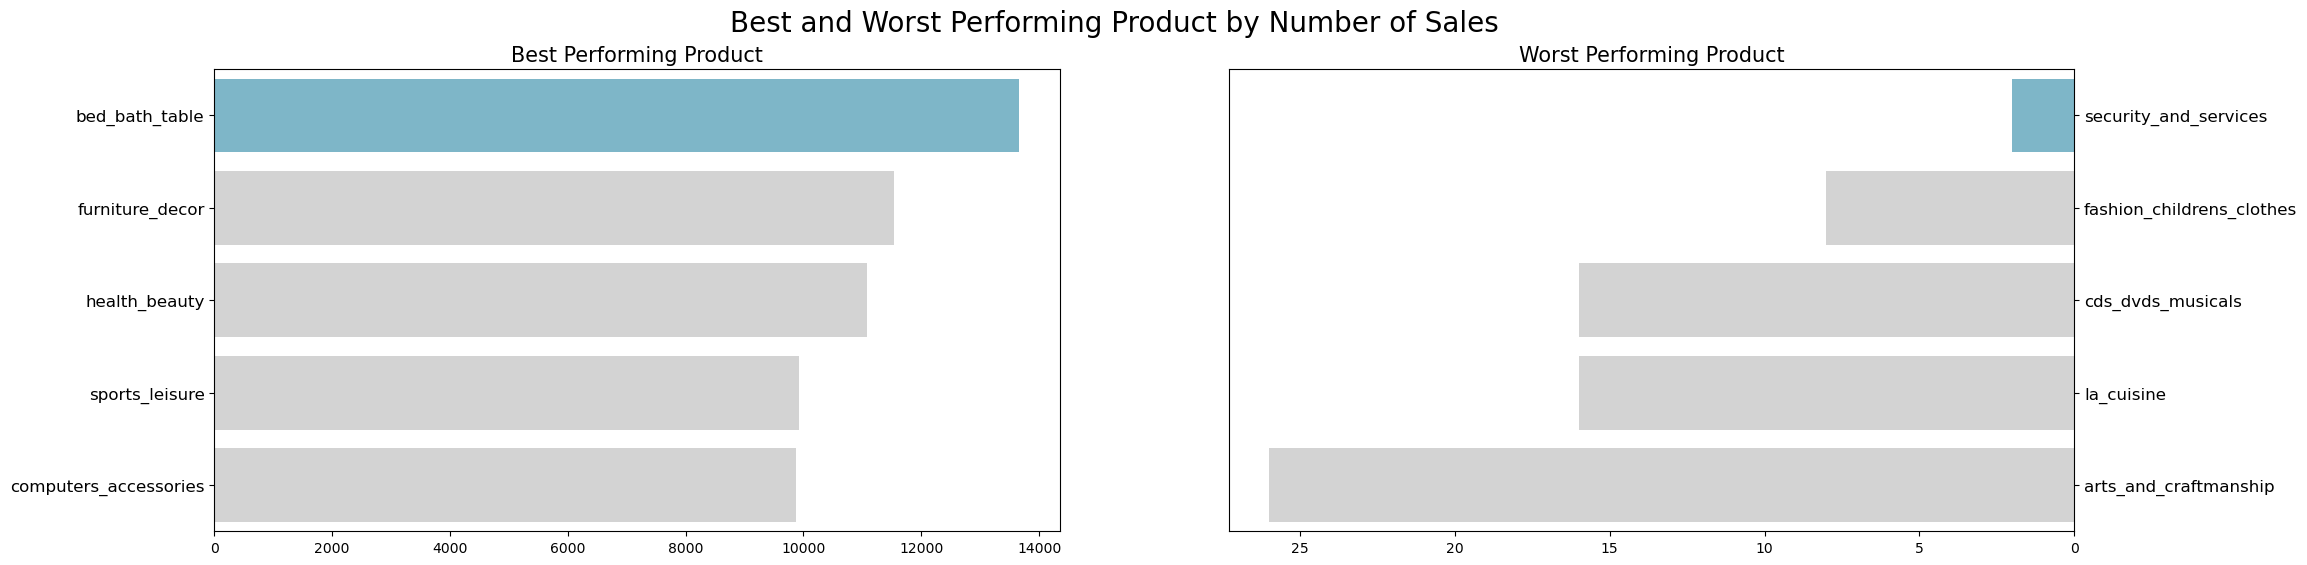

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="item_sold", y="product_category_name_english", data=sales_df[["item_sold"]].sort_values(by="item_sold",ascending=False).reset_index().head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="item_sold", y="product_category_name_english", data=sales_df[["item_sold"]].sort_values(by="item_sold",ascending=True).reset_index().head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\1042738202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="item_value", y="product_category_name_english", data=sales_df[["item_value"]].sort_values(by="item_value",ascending=False).reset_index().head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\1042738202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="item_value", y="product_category_name_english", data=sales_df[["item_value"]].sort_values(by="item_value",ascending=True).reset_index().head(5), palette=colors, ax=ax[1])


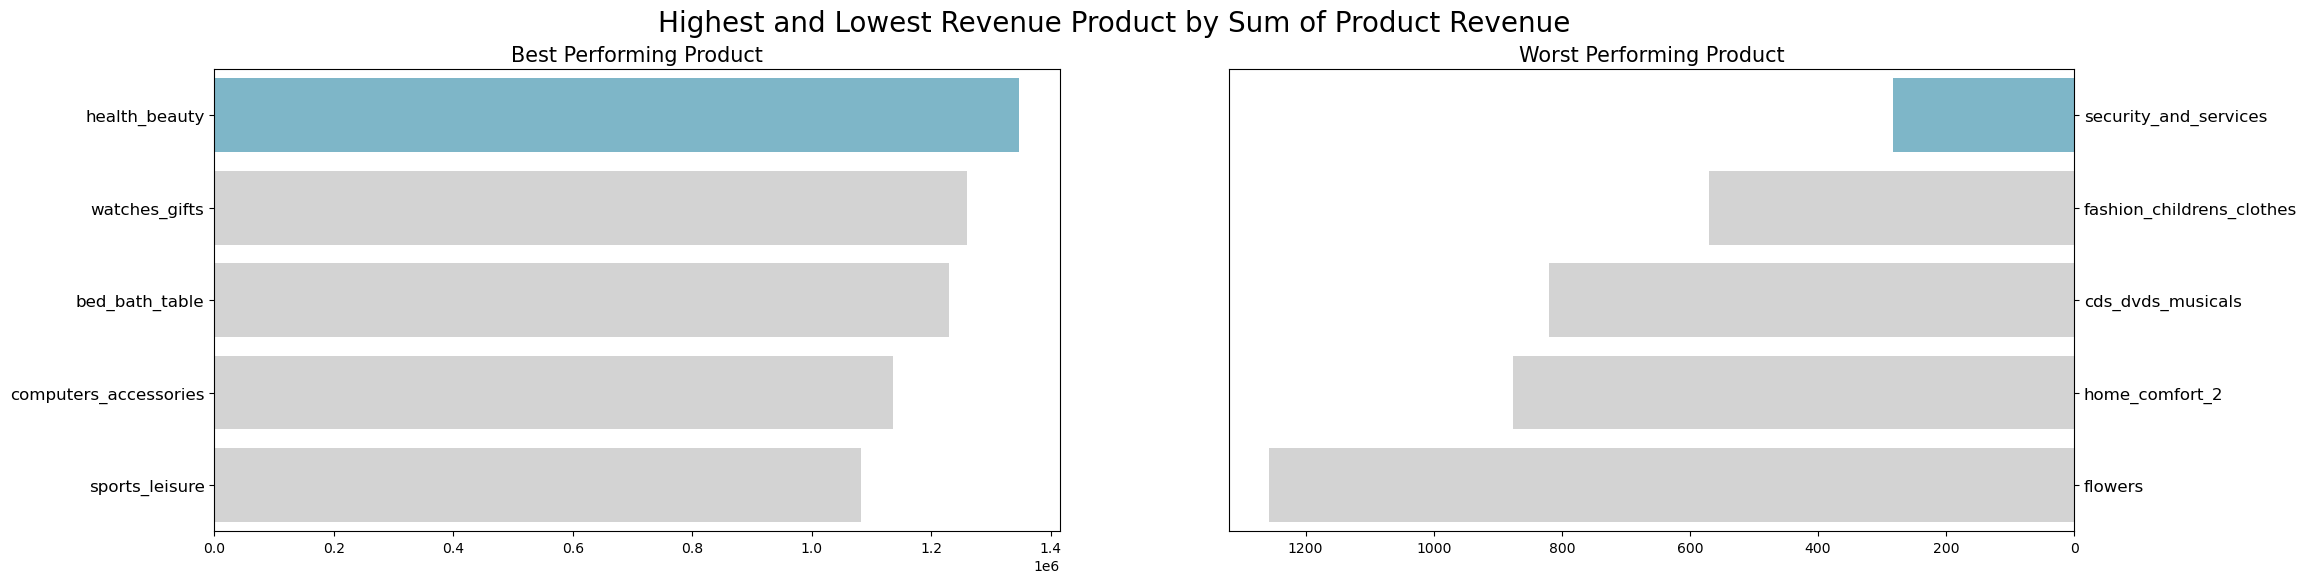

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="item_value", y="product_category_name_english", data=sales_df[["item_value"]].sort_values(by="item_value",ascending=False).reset_index().head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="item_value", y="product_category_name_english", data=sales_df[["item_value"]].sort_values(by="item_value",ascending=True).reset_index().head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Highest and Lowest Revenue Product by Sum of Product Revenue", fontsize=20)
plt.show()

**Insight:**
- Produk dengan **performa terbaik** yang berdasarkan pada banyak produk yang terjual adalah pada kategori produk **bed_bath_table** dilanjutkan dengan furniture_decor dan health_beauty
- Sedangkan **performa terburuk** adalah pada kategori produk **security_and_service** dilanjutkan dengan fashin_childrens_clothes dan cds_dvds_musicals
- Di sisi lain, produk dengan **pendapatan tertinggi** adalah pada kategori produk **health_beauty** dilanjutkan dengan watches_gifts dan bed_bath_table
- Sedangkan **pendapatan terendah** adalah pada kategori produk **security_and_service** dilanjutkan dengan fashion_childrens_clothes dan cds_dvds_musicals

### Pertanyaan 2
Berapa rerata jarak antara penjual dengan pembeli serta waktu persiapan barang hingga terkirim ke pembeli?

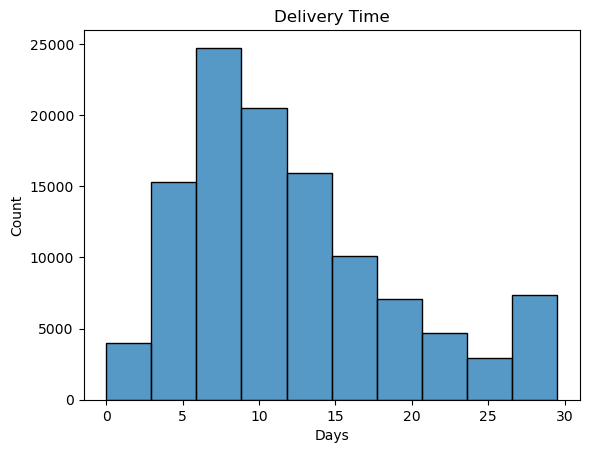

In [146]:
sns.histplot(x=delivery_time,
             bins=10
             )
plt.title("Delivery Time")
plt.xlabel("Days")
plt.show()

In [147]:
delivery_time.describe()

count    112650.000000
mean         11.894976
std           7.127846
min           0.000000
25%           7.000000
50%          10.000000
75%          16.000000
max          29.500000
dtype: float64

**Insight:**
- Lama proses mempersiapkan barang dari penjual hingga siap dikirim ke pembeli memiliki kisaran waktu 5-19 hari dengan rerata 12 hari

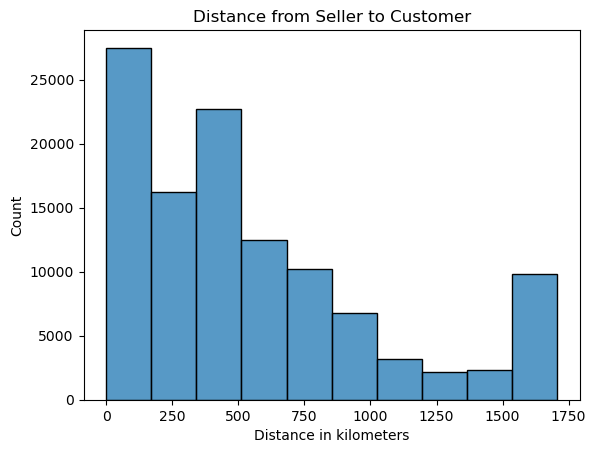

In [149]:
sns.histplot(x=jarak_df["order_distance"],
             bins=10
             )
plt.title("Distance from Seller to Customer")
plt.xlabel("Distance in kilometers")
plt.show()

**Insight:**
- Jarak antara penjual dan pembeli berkisar 74-1046 kilometer dengan rerata 560 kilometer

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\240066236.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\240066236.py:7: UserWarning: The palette list has more values (43) than needed (27), which may not be intended.
  sns.barplot(


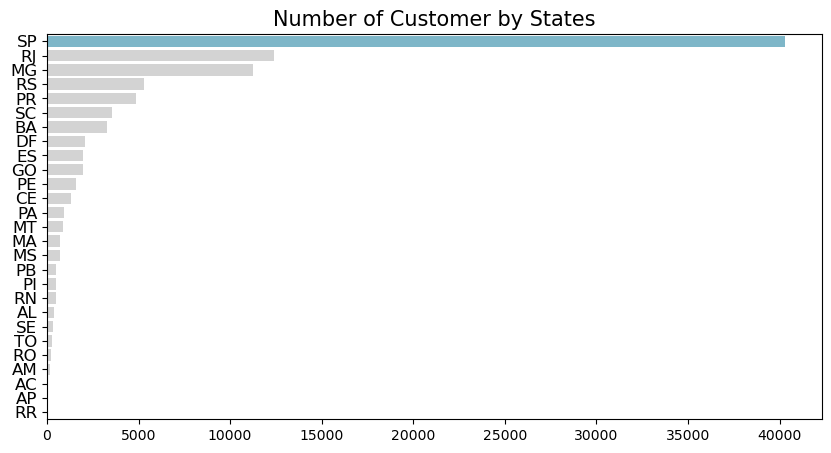

In [151]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", 
           "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", 
           "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", 
           "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", 
           "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Negara bagian dengan pembeli terbanyak berada pada São Paulo

### Pertanyaan 3
Bagaimana RFM pada Olist Store pada dari tahun 2016-2018?

In [154]:
all_df.groupby(by="customer_id", as_index=False).agg({
    "order_id": "nunique" # menghitung jumlah order
})

,customer_id,order_id
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,1
98662,fffecc9f79fd8c764f843e9951b11341,1
98663,fffeda5b6d849fbd39689bb92087f431,1
98664,ffff42319e9b2d713724ae527742af25,1


In [155]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51.000000000,2016-11-09 07:47:38.000,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,2016-10-25 06:33:51.666666752,2016-11-09 07:47:38.000,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,2016-10-31 23:52:52.333333248,2016-11-09 07:47:38.000,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53.000000000,2016-11-09 07:47:38.000,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,2016-10-31 03:37:03.000000000,2016-11-02 10:54:55.500,2016-10-25
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-10-15
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-10-23
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-10-16
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,2018-09-03 17:40:06,2018-09-04 15:25:00.000000000,2018-08-30 16:23:36.000,2018-11-12


In [156]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [157]:
customers_df.groupby(by="customer_unique_id", as_index=False).agg({
    "customer_id": "nunique" # menghitung jumlah order
}).sort_values(by="customer_id")

,customer_unique_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
63580,a926cfc9bc7b082335de50450f48eec9,1
63579,a926aae38267e7f54e67de9b5775d0a5,1
63578,a92605ec492805540520d3a73aaeeb6e,1
63577,a925c3e5df82fdc6082f1383d2834998,1
...,...,...
76082,ca77025e7201e3b30c44b472ff346268,7
37797,6469f99c1f9dfae7733b25662e7f1782,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
23472,3e43e6105506432c953e165fb2acf44c,9


In [158]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "order_item_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,119
2,0000f46a3911fa3c0805444483337064,1,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,293


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\168184745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\168184745.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10836\168184745.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

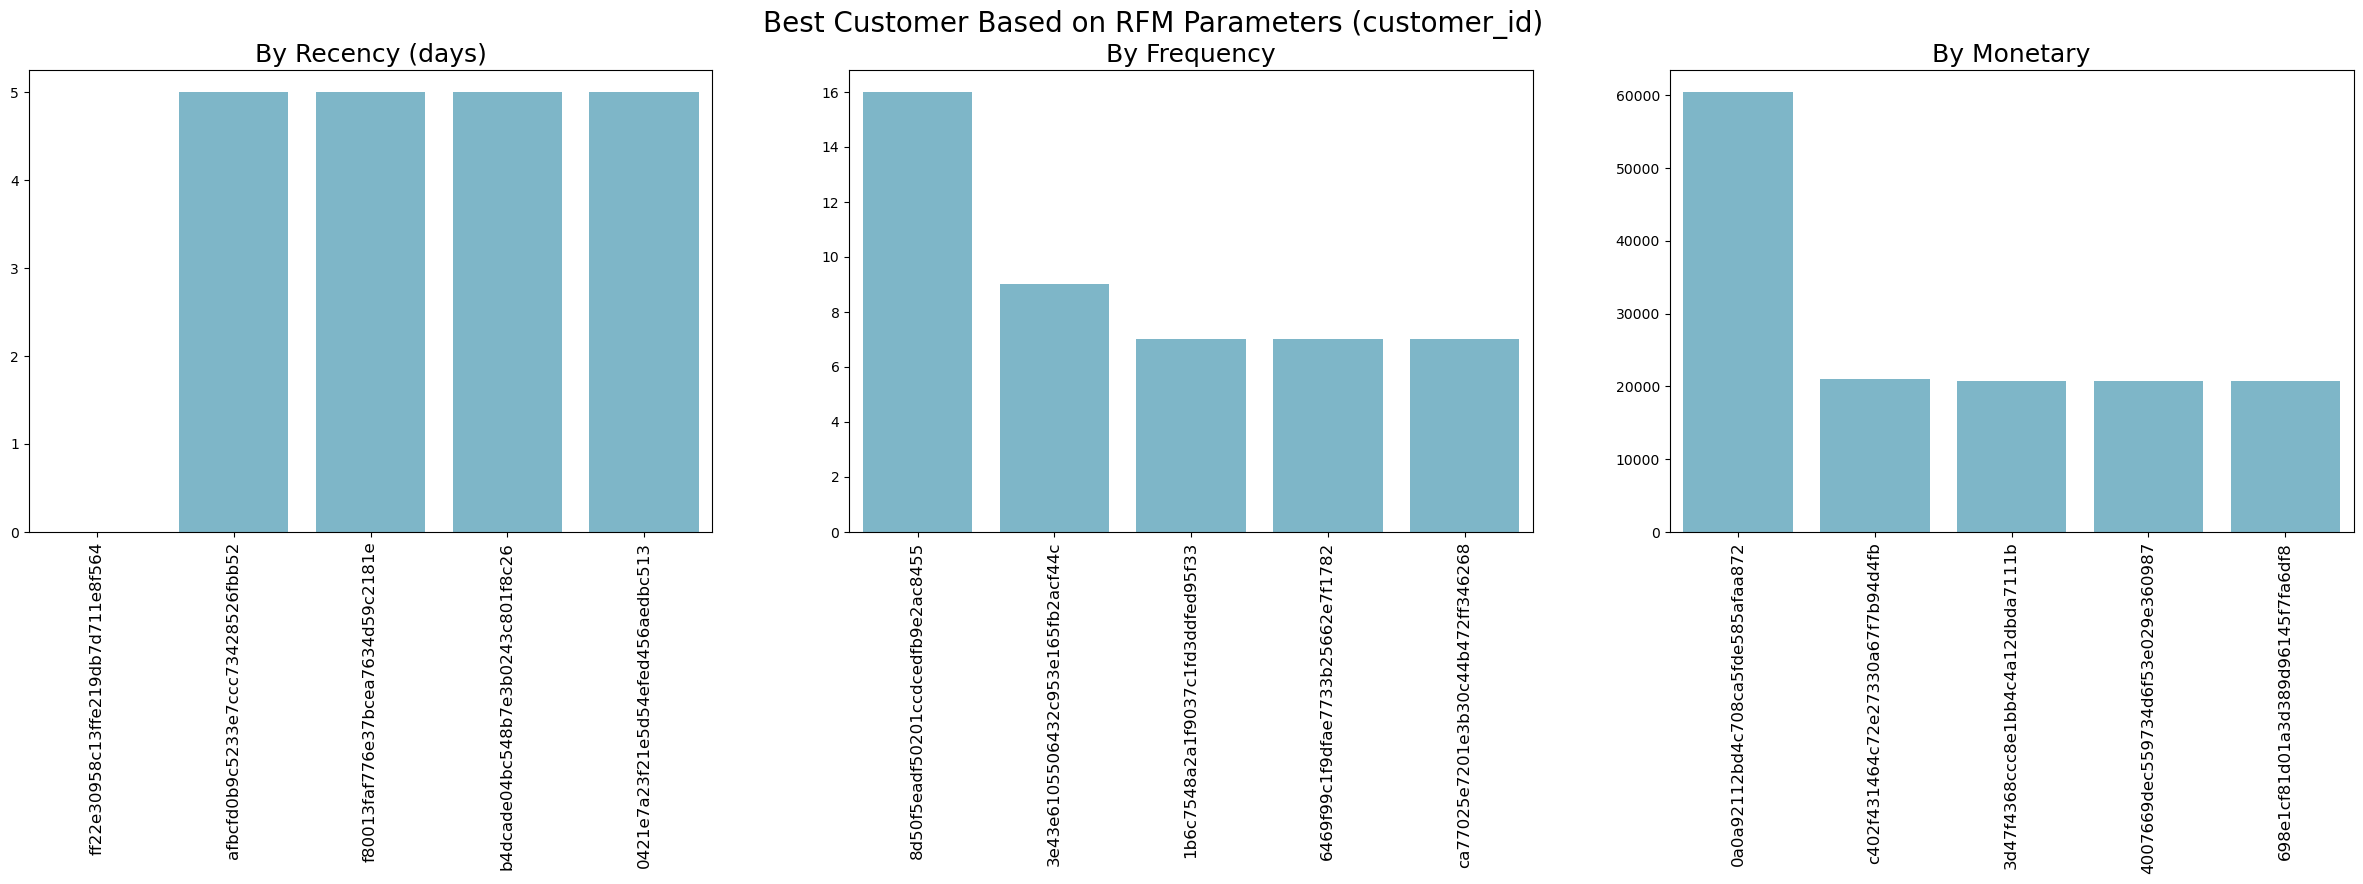

In [159]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelrotation=90, labelsize=12)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=90, labelsize=12)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelrotation=90, labelsize=12)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [160]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
95083,ff22e30958c13ffe219db7d711e8f564,2,290.00,0
65645,afbcfd0b9c5233e7ccc73428526fbb52,1,1373.25,5
92476,f80013faf776e37bcea7634d59c2181e,1,65.00,5
67518,b4dcade04bc548b7e3b0243c801f8c26,1,99.00,5
1538,0421e7a23f21e5d54efed456aedbc513,1,109.90,5


**Insight:**
- Berdasarkan tabel recency, pelanggan yang melakukan order terbaru adalah pelanggan dengan id ff22e30958c13ffe219db7d711e8f564
- Berdasarkan tabel frequency, pelanggan dengan frekuensi order tertinggi sebanyak 16 kali oleh id 8d50f5eadf50201ccdcedfb9e2ac8455
- Berdasarkan tabel monetary, pelanggan yang memberikan pendapatan tertinggi berkisar 60000 BRL oleh id 0a0a92112bd4c708ca5fde585afaa872

## Conclusion

- Performa produk pada Olist Store dapat dilihat dari beberapa hal seperti banyak produk yang terjual 
dan pendapatan yang diperoleh dari penjualan produk. Dalam hal ini, kategori produk yang terjual terbanyak adalah bed_bath_table 
dan kategori produk dengan pendapatan tertinggi adalah health_beauty.
- Jarak antara penjual dan pemeli dapat diperoleh jarak dari koordinat lintang (latitude) dan bujur (longitude) penjual dan pembeli.
Diperoleh rerata jarak antara penjual dan pembeli adalah 560 kilometer. Diperoleh juga rerata lama waktu persiapan barang yaitu 12 hari.
Kemudian, didapatkan data menarik berupa kebanyakan pembeli berada negara bagian São Paulo.
- Diperoleh id ff22e30958c13ffe219db7d711e8f564 adalah pelanggan dengan order terbaru. Kemudian, id 8d50f5eadf50201ccdcedfb9e2ac8455 merupakan pelanggan dengan frekuensi order terbanyak yaitu sebanyak 16 kali. Selanjutnya, id 0a0a92112bd4c708ca5fde585afaa872 merupakan pelanggan yang memberikan pendapatan tertinggi berkisar 60000 BRL.

## Membuat all_data.csv

In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [165]:
all_df_tes = pd.read_csv("all_data.csv")
all_df_tes.head()

,order_id,order_item_id,product_id,seller_id,price,order_item_value,order_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time,customer_unique_id,customer_state,product_category_name_english,review_score,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,58.90,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48.000000000,8.0,871766c5855e863f6eccc05f988b23cb,RJ,cool_stuff,5.0,-21.763186,-41.310265,-22.497188,-44.127324
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24.000000000,16.0,eb28e67c4c0b83846050ddfb8a35d051,SP,pet_shop,4.0,-20.222506,-50.898951,-23.565754,-46.519097
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16.000000000,8.0,3818d81c6709e39d06b2738a8d3a2474,MG,furniture_decor,5.0,-19.869998,-44.593059,-22.262802,-46.170735
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39.000000000,6.0,af861d436cfc08b2c2ddefd0ba074622,SP,perfumery,4.0,-23.105968,-46.590277,-20.553651,-47.387145
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31.000000000,25.0,64b576fb70d441e8f1b2d7d446e483c5,SP,garden_tools,5.0,-23.243402,-46.827614,-22.929583,-53.135750


In [166]:
all_df_tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113410 entries, 0 to 113409
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113410 non-null  object 
 1   order_item_id                  113410 non-null  int64  
 2   product_id                     113410 non-null  object 
 3   seller_id                      113410 non-null  object 
 4   price                          113410 non-null  float64
 5   order_item_value               113410 non-null  float64
 6   order_value                    113410 non-null  float64
 7   customer_id                    113410 non-null  object 
 8   order_status                   113410 non-null  object 
 9   order_purchase_timestamp       113410 non-null  object 
 10  order_delivered_customer_date  113410 non-null  object 
 11  delivery_time                  113410 non-null  float64
 12  customer_unique_id            